In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_train)

60000

In [4]:
type(X_train)

numpy.ndarray

In [ ]:
matplotlib.pyplot.matshow(X_train[0])

In [11]:
y_test[1]

2

In [20]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [16]:
X_test_flattened.shape

(10000, 784)

In [24]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4751 - accuracy: 0.8746
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2734 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2667 - accuracy: 0.9258


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2698 - accuracy: 0.9239


[0.2698085904121399, 0.9239000082015991]

In [43]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 4ms/step


array([4.4072114e-04, 1.5191418e-05, 1.5890680e-02, 7.7883220e-01,
       4.6698901e-08, 1.5893377e-03, 6.1453218e-11, 9.9999869e-01,
       3.8603023e-03, 3.5606673e-01], dtype=float32)

In [36]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [38]:
tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [  10,    9,  925,   20,    8,    1,   11,   10,   33,    5],
       [   3,    0,   16,  939,    0,   15,    2,    9,   17,    9],
       [   2,    1,    4,    3,  904,    0,    9,    4,   10,   45],
       [  11,    3,    4,   49,   11,  760,   11,    4,   31,    8],
       [  17,    3,    7,    1,    8,   10,  907,    2,    3,    0],
       [   1,    8,   22,    9,    7,    0,    0,  935,    2,   44],
       [   9,    8,    7,   29,    9,   22,    8,    9,  860,   13],
       [  12,    7,    1,   13,   23,    4,    0,   15,    4,  930]])>

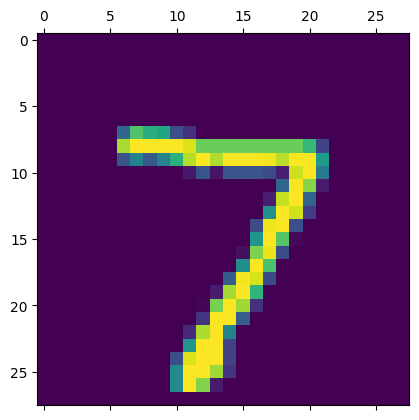

In [31]:
plt.matshow(X_test[0])

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2790 - accuracy: 0.9205
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1270 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0674 - accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0804 - accuracy: 0.9773


[0.08036815375089645, 0.9772999882698059]

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

313/313 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    1,    0,    2,    3,    6,    1,    1,    1],
       [   0, 1121,    4,    0,    0,    2,    4,    1,    3,    0],
       [   5,    2, 1013,    0,    1,    1,    1,    3,    5,    1],
       [   0,    0,   10,  982,    0,    6,    0,    4,    3,    5],
       [   0,    0,    5,    0,  962,    2,    3,    1,    0,    9],
       [   2,    0,    0,    7,    1,  872,    5,    0,    4,    1],
       [   1,    2,    1,    1,    6,    7,  940,    0,    0,    0],
       [   0,    4,   11,    2,    1,    1,    0, 1002,    2,    5],
       [   5,    1,    3,    4,    5,    7,    5,    2,  937,    5],
       [   0,    2,    0,    4,   10,    6,    1,    4,    2,  980]])>

In [62]:
a = model.predict(X_test_flattened)
type(a)

313/313 [==============================] - 1s 3ms/step


numpy.ndarray

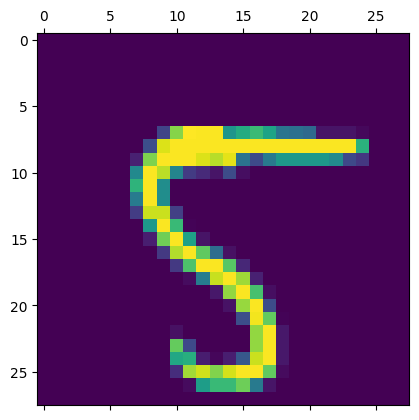

In [69]:
plt.matshow(X_test[3645])

In [78]:
a = model.predict(X_test_flattened)
inp = int(input("Enter the number to be predicted between 0-9:"))
print('To check, run the next statement and enter the image number.')
for i in range(10000):
    if np.argmax(a[i]) == inp:
        print('Image number', i, 'has', inp)
print('To check, enter image number in next statement and run.')

313/313 [==============================] - 1s 4ms/step
Enter the number to be predicted between 0-9:8
To check, run the next statement and enter the image number.
Image number 61 has 8
Image number 84 has 8
Image number 110 has 8
Image number 128 has 8
Image number 134 has 8
Image number 146 has 8
Image number 151 has 8
Image number 177 has 8
Image number 179 has 8
Image number 181 has 8
Image number 184 has 8
Image number 226 has 8
Image number 232 has 8
Image number 233 has 8
Image number 242 has 8
Image number 257 has 8
Image number 260 has 8
Image number 266 has 8
Image number 268 has 8
Image number 277 has 8
Image number 290 has 8
Image number 299 has 8
Image number 338 has 8
Image number 344 has 8
Image number 355 has 8
Image number 373 has 8
Image number 374 has 8
Image number 391 has 8
Image number 401 has 8
Image number 403 has 8
Image number 429 has 8
Image number 431 has 8
Image number 435 has 8
Image number 436 has 8
Image number 458 has 8
Image number 465 has 8
Image numbe

Enter image number:1249


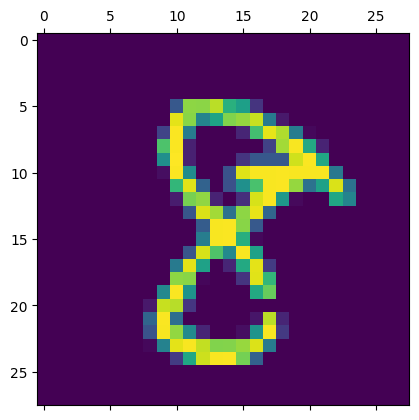

In [81]:
img_num = int(input('Enter image number:'))
plt.matshow(X_test[img_num])